In [1]:
import csv
import numpy as np
import pandas as pd
import future

In [2]:
DS = pd.read_csv("ObjectSubset150SentenceLength.csv")

In [3]:
DS

,text_ID,word,tag
0,46809,RR,object
1,46809,130/80,object
2,46809,mmHg.,NaN
3,47482,"RR142/89mmHg,",object
4,47482,HR,NaN
...,...,...,...
157275,1624218,saamiseks.,NaN
157276,1624218,RR,object
157277,1624218,"140/90,",object
157278,1624218,VS,NaN


In [4]:
DS['tag'].fillna('text', inplace=True)

In [5]:
DS.head(n=20)

,text_ID,word,tag
0,46809,RR,object
1,46809,130/80,object
2,46809,mmHg.,text
3,47482,"RR142/89mmHg,",object
4,47482,HR,text
5,47482,76,text
6,47482,x,text
7,47482,"min,",text
8,47482,"p167cm,",text
9,47482,k89kg.,text


In [6]:
class SentenceGetter(object):
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("text_ID").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [7]:
getter = SentenceGetter(DS)
sentences = getter.sentences

In [8]:
sentences[1]

[('Pt.', 'text'),
 ('tehtud', 'text'),
 ('3', 'text'),
 ('plasmaferees,', 'text'),
 ('talus', 'text'),
 ('hästi.', 'text'),
 ('Eemaldatud', 'text'),
 ('700', 'text'),
 ('ml', 'text'),
 ('plasmat.', 'text'),
 ('RR', 'object'),
 ('112/60', 'object'),
 ('mmHg.', 'text'),
 ('Tgasi', 'text'),
 ('22.10.09.', 'text')]

In [9]:
len(sentences)

13643

In [10]:
# import pickle
# with open('sentences5000.txt', 'wb') as f:
#   pickle.dump(sentences, f)

In [11]:
# with open('sentences2000.txt', 'rb') as f:
#     sentences = pickle.load(f)

In [12]:
LengthsList = []
for i in range(len(sentences)):
    LengthsList.append(len(sentences[i]))

In [13]:
np.median(LengthsList)

10.0

In [14]:
from math import nan

words = list(set(DS["word"].values))
n_words = len(words)

tags = list(set(DS["tag"].values))
n_tags = len(tags); 


from future.utils import iteritems

word2idx = {w: i for i, w in enumerate(words)}
# tag2idx["PAD"] = 0
tags2 = ["PAD","text","object"]
tag2idx = {t: i for i, t in enumerate(tags2)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [15]:
idx2tag

{0: 'PAD', 1: 'text', 2: 'object'}

In [16]:
len(words)

27741

In [17]:
max([len(s) for s in sentences])

150

In [18]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# maxlen = max([len(s) for s in sentences])
maxlen = 150
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=tag2idx["PAD"], truncating='post')

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["PAD"], truncating='post')
y = [to_categorical(i, num_classes=n_tags +1) for i in y]

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2018)

Using TensorFlow backend.


In [19]:
tag2idx

{'PAD': 0, 'text': 1, 'object': 2}

In [20]:
y_train[3]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [21]:
y_train[2]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [22]:
X_train[1]

array([ 3812, 11371, 18925,  4399,  7346,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [23]:
# import pickle
# def StoreData(myObject,ObjectName):
#         with open(ObjectName+'.txt', 'wb') as f:
#           pickle.dump(myObject, f)

In [24]:
# StoreData(X_train,"X_train")
# StoreData(X_test,"X_test")
# StoreData(y_train,"y_train")
# StoreData(y_test,"y_test")

In [25]:
# with open('X_test.txt', 'rb') as f:
#     # Step 3
#     X_test = pickle.load(f)

In [26]:
X_train.shape

(10914, 150)

In [27]:
# from keras.models import load_model
# # def fake_loss(y_true,y_pred):
# #         return 0
# # def crf_viterbi_accuracy(y_true,y_pred):
# #         return 0
# from keras_contrib.layers.crf import CRF, crf_loss, crf_viterbi_accuracy
# model = load_model('ner-CNN-bi-lstm-model-FULL-0.99.hdf5', custom_objects={'CRF':CRF, 'crf_loss': crf_loss,'crf_viterbi_accuracy': crf_viterbi_accuracy})


In [28]:
# output_dim = 1 + (input_dim - kernel_size)/stride


In [29]:
# n_words + 2 - 2 / 2

In [30]:
from keras.models import Model, Input
from keras.layers import TimeDistributed,SpatialDropout1D,LSTM,MaxPooling1D,Flatten,Embedding, Dense, TimeDistributed, Conv1D,Dropout, Bidirectional
import keras as k
from keras_contrib.layers import CRF

input = Input(shape=(maxlen,))
# Embedding Layer
model = Embedding(input_dim=n_words + 2  , output_dim=20, input_length=maxlen)(input)


# (number of sentences,  words, 100 output dimension or filters)   
# 495,19352,150
# batchSize = number of sentences    
# length = number of words in each sentence   
# channels = dimension of the embedding's output.  
# (19352,495)
model = Conv1D(filters=20,
              kernel_size= 5,  # 3 means 3 words
              padding='same',  # valid means no padding
              strides=1,  # see explnation above
              activation='relu')(model)

# model = MaxPooling1D(pool_size=2,padding="same")(model) # (?, 27, 10), (?, 24, 10)
# model = Flatten()(model) # (?, 270), (?, 240)

# model = LSTM(units=20, 
#              return_sequences=True, 
#              recurrent_dropout=0.5)(model)     

model = SpatialDropout1D(0.3)(model)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=20, 
                           return_sequences=True, 
                           recurrent_dropout=0.5))(model)



# TimeDistributed Layer
model = TimeDistributed(Dense(n_tags+1, activation="softmax"))(model)  

# CRF Layer
crf = CRF(n_tags + 1)

out = crf(model)  # output
model = Model(input, out)

In [31]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


# Compile model
model.compile(optimizer="adam", loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

model.summary(line_length=100)


C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\keras_contrib-2.0.8-py3.7.egg\keras_contrib\layers\crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\keras_contrib-2.0.8-py3.7.egg\keras_contrib\layers\crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy


Model: "model_1"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_1 (InputLayer)                         (None, 150)                             0              
____________________________________________________________________________________________________
embedding_1 (Embedding)                      (None, 150, 20)                         554860         
____________________________________________________________________________________________________
conv1d_1 (Conv1D)                            (None, 150, 20)                         2020           
____________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDropout1D)       (None, 150, 20)                         0              
__________________________________________________________________________

In [33]:
!pip install GraphViz 

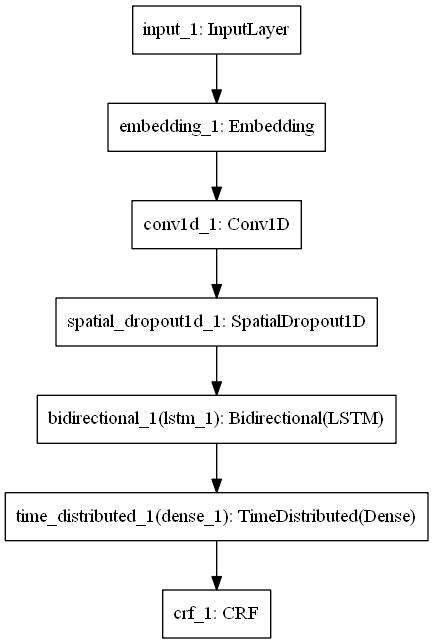

In [40]:
from keras.utils import plot_model
plot_model(model, to_file='CNNmodel.png')


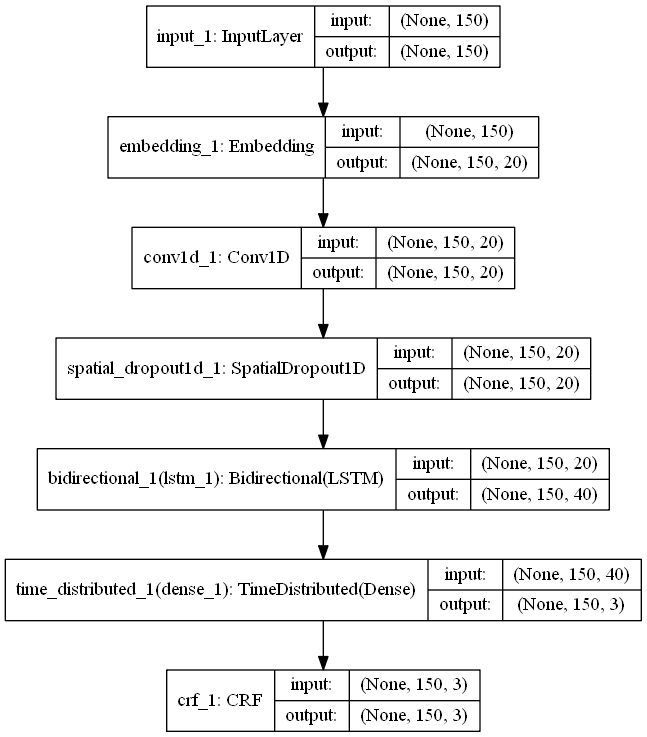

In [41]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CNNmodel_plot.png', show_shapes=True, show_layer_names=True)

In [30]:

# Saving the best model only
filepath="ner-CNN-bi-lstm-model-OBJECT-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the best model
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=10, validation_split=0.1, verbose=1, callbacks=callbacks_list)

C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9822 samples, validate on 1092 samples
Epoch 1/10
9822/9822 [==============================] - 36s 4ms/step - loss: 0.6624 - crf_viterbi_accuracy: 0.7980 - accuracy: 0.9226 - val_loss: 0.2856 - val_crf_viterbi_accuracy: 0.9842 - val_accuracy: 0.9842

Epoch 00001: val_accuracy improved from -inf to 0.98415, saving model to ner-CNN-bi-lstm-model-OBJECT-0.98.hdf5
Epoch 2/10
9822/9822 [==============================] - 34s 3ms/step - loss: 0.1806 - crf_viterbi_accuracy: 0.9851 - accuracy: 0.9226 - val_loss: 0.1176 - val_crf_viterbi_accuracy: 0.9857 - val_accuracy: 0.9856

Epoch 00002: val_accuracy improved from 0.98415 to 0.98564, saving model to ner-CNN-bi-lstm-model-OBJECT-0.99.hdf5
Epoch 3/10
9822/9822 [==============================] - 34s 3ms/step - loss: 0.0938 - crf_viterbi_accuracy: 0.9901 - accuracy: 0.9226 - val_loss: 0.0766 - val_crf_viterbi_accuracy: 0.9910 - val_accuracy: 0.9911

Epoch 00003: val_accuracy improved from 0.98564 to 0.99107, saving model to ner-CNN-bi-ls

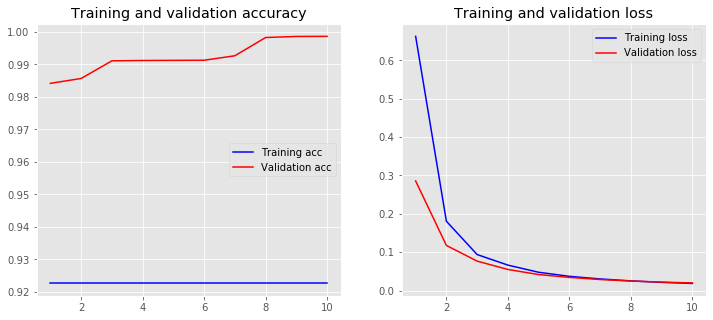

In [31]:
# Plot the graph 
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)


In [32]:
idx2tag

{0: 'PAD', 1: 'text', 2: 'object'}

In [33]:
test_pred = model.predict(X_test, verbose=1)   


2729/2729 [==============================] - 2s 904us/step


In [34]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD","text"))
        out.append(out_i)
    return out
# test_pred = model.predict(X_test, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

In [35]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 86.2%


In [36]:
print(classification_report(test_labels, pred_labels))

           precision    recall  f1-score   support

     text       0.86      0.86      0.86      4461
   object       0.85      0.87      0.86      2104

micro avg       0.86      0.87      0.86      6565
macro avg       0.86      0.87      0.86      6565



In [37]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

              precision    recall  f1-score   support

      object       0.91      0.93      0.92      3653
        text       1.00      1.00      1.00    405697

    accuracy                           1.00    409350
   macro avg       0.96      0.97      0.96    409350
weighted avg       1.00      1.00      1.00    409350



In [42]:
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))

i=5
for w,true, pred in zip(X_test[i], test_labels[i] ,pred_labels[i]):
    if words[w] != "Urea":
        print("{:15}: {:5} {}".format(words[w],true,pred))


Word           ||True ||Pred
30.04.2013     : text  text
-              : text  text
kaal           : text  text
58             : text  text
kg,            : text  text
pikkus         : text  text
164            : text  text
cm,            : text  text
KMI            : text  text
20             : text  text
30.04.2013     : text  text
-              : text  text
RR             : object object
145/79,        : object object
fr.            : text  text
86             : text  text
x'             : text  text
.              : text  text


In [39]:
test_sentence = " Tupp vaba, em.kael puhas, RR 155/85 mmhg ."
test_sentence = ''.join(test_sentence).split() 

In [40]:
x_test_sent = pad_sequences(sequences=[[word2idx.get(w, 0) for w in test_sentence]],
                            padding="post", value=tag2idx["PAD"], truncating='post', maxlen=maxlen)


In [41]:
p = model.predict(x_test_sent)
p = pred2label(p)
# p = np.argmax(p, axis=-1)
print("{:15}||{}".format("Word", "Prediction"))
print(30 * "=")
for w, pred in zip(test_sentence, p[0]):
    print("{:15}: {:5}".format(w, pred))


Word           ||Prediction
Tupp           : text 
vaba,          : text 
em.kael        : text 
puhas,         : text 
RR             : object
155/85         : object
mmhg           : text 
.              : text 
